# 2 Fidelity
## 2.1 tSNE and PCA plots
We apply t-SNE and PCA (Principle Component Analysis) analyses on both the original and synthetic
datasets (flattening the temporal dimension). This visualizes how closely the distribution of generated
samples resembles that of the original in 2-dimensional space,

_More explanation of t-SNE:_  

   *T-SNE can reduce a multi-column (i.e.multidimensional) data to 2D (or 3D) so that it can be visualised. It is an unsupervised machine learning algorithm studying how to group 'similar' data together (by measuring the difference between each columns and the probability of showing up) . We cannot interpret why a data fall on that position in the 2D plot, but we can compare whether the real data and synthetic data have similar patterns in the 2D plot.*

In [ ]:
import numpy as np
import pandas as pd
#Load and preprocess real and synthetic data.
#All are dataframes in shape (no_sample * time_seq, dimension)
dp_ori_df = pd.read_csv('dp_ori.csv') # dataframe of shape(1347*130, 5)
dp_gen_df = pd.read_csv('dp_gen.csv') # dataframe of shape(1347*130, 5)
tgan_ori_df = pd.read_csv('tgan_ori.csv') #dataframe of shape (1239*10, 10)
tgan_gen_df = pd.read_csv('tgan_gen.csv') #dataframe of shape (1230*10, 10)

In [ ]:
def CutTimeSequence(a,time_sequence): 
    '''A function which transforms temporal-sequence-flattened dataframe or array (e.g. the loaded dataframes) to array in shape (no_sample, time_seq, dimension)
    
    Args:
    a: the dataframe or array in shape (no_sample * time_seq, dimension)
    time_sequence: the time_seq argument in the shape of the returned array
    
    Returns:
    new_a : array in new shape (no_sample, time_seq, dimension)
    
    '''
    if type(a)==pd.core.frame.DataFrame:
        a = a.values
    l,d = a.shape
    new_a = np.zeros((int(l/time_sequence),time_sequence,d))
    for i in range(l):
        new_a[int(i/time_sequence),i%time_sequence,:]=a[i,:]
    return new_a

In [ ]:
dp_ori_data = CutTimeSequence(dp_ori_df,130)
dp_gen_data = CutTimeSequence(dp_gen_df,130)

In [ ]:
tgan_ori_data = CutTimeSequence(tgan_ori_df,10)
tgan_gen_data = CutTimeSequence(tgan_gen_df,10)

In [ ]:
#fill all NaN's in data with 0
tgan_ori_data[np.isnan(tgan_ori_data)]=0
tgan_gen_data[np.isnan(tgan_gen_data)]=0

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

   
def visualization (ori_data, generated_data, analysis):
    """Using PCA or tSNE for generated and original data visualization.

    Args:
    - ori_data: original data
    - generated_data: generated synthetic data
    - analysis: tsne or pca
    """  
    # Analysis sample size (for faster computation)
    anal_sample_no = min([1000, len(ori_data)])
    idx = np.random.permutation(len(ori_data))[:anal_sample_no]

    # Data preprocessing
    ori_data = np.asarray(ori_data)
    generated_data = np.asarray(generated_data)  

    ori_data = ori_data[idx]
    generated_data = generated_data[idx]

    no, seq_len, dim = ori_data.shape  

    for i in range(anal_sample_no):
        if (i == 0):
          prep_data = np.reshape(np.mean(ori_data[0,:,:], 1), [1,seq_len])
          prep_data_hat = np.reshape(np.mean(generated_data[0,:,:],1), [1,seq_len])
        else:
          prep_data = np.concatenate((prep_data, 
                                      np.reshape(np.mean(ori_data[i,:,:],1), [1,seq_len])))
          prep_data_hat = np.concatenate((prep_data_hat, 
                                          np.reshape(np.mean(generated_data[i,:,:],1), [1,seq_len])))

    # Visualization parameter        
    colors = ["red" for i in range(anal_sample_no)] + ["blue" for i in range(anal_sample_no)]    

    if analysis == 'pca':
        # PCA Analysis
        pca = PCA(n_components = 2)
        pca.fit(prep_data)
        pca_results = pca.transform(prep_data) #PCA coordinates for the real data
        pca_hat_results = pca.transform(prep_data_hat) #PCA coordinates for the synthetic data

        # Plotting
        f, ax = plt.subplots(1)    
        plt.scatter(pca_results[:,0], pca_results[:,1],
                    c = colors[:anal_sample_no], alpha = 0.2, label = "Original")
        plt.scatter(pca_hat_results[:,0], pca_hat_results[:,1], 
                    c = colors[anal_sample_no:], alpha = 0.2, label = "Synthetic")

        ax.legend()  
        plt.title('PCA plot')
        plt.xlabel('x-pca')
        plt.ylabel('y_pca')
        plt.show()

        return pca_results, pca_hat_results

    elif analysis == 'tsne':

        # Do t-SNE Analysis together       
        prep_data_final = np.concatenate((prep_data, prep_data_hat), axis = 0)

        # TSNE anlaysis
        tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
        tsne_results = tsne.fit_transform(prep_data_final) #tSNE coordinates, 
        #for [:anal_sample_no, : ] are the coordinates for the original,
        #for [anal_sample_no: , : ] are the coordinates for the generated

        # Plotting
        f, ax = plt.subplots(1)

        plt.scatter(tsne_results[:anal_sample_no,0], tsne_results[:anal_sample_no,1], 
                    c = colors[:anal_sample_no], alpha = 0.2, label = "Original")
        plt.scatter(tsne_results[anal_sample_no:,0], tsne_results[anal_sample_no:,1], 
                    c = colors[anal_sample_no:], alpha = 0.2, label = "Synthetic")

        ax.legend()

        plt.title('t-SNE plot')
        plt.xlabel('x-tsne')
        plt.ylabel('y_tsne')
        plt.show() 

        return tsne_results[:anal_sample_no, :], tsne_results[anal_sample_no:,:]
        



Visualisation of PCA and tSNE plots for doppelGANger

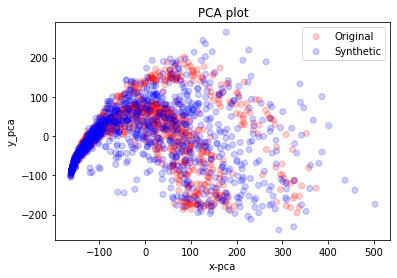

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.023s...
[t-SNE] Computed neighbors for 2000 samples in 0.959s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 20.582964
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.981262
[t-SNE] KL divergence after 300 iterations: 0.739459


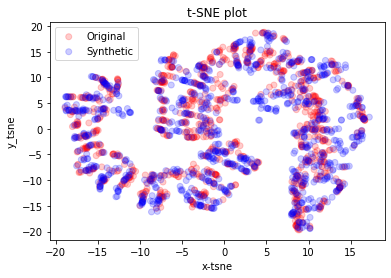

In [ ]:
dp_pca_results, dp_pca_hat_results = visualization(dp_ori_data, dp_gen_data, 'pca')
dp_tsne_results, dp_tsne_hat_results = visualization(dp_ori_data, dp_gen_data, 'tsne')

In [ ]:
# Save coordinates for d3 plots

dp_pca_np = np.concatenate([dp_pca_results, dp_pca_hat_results], axis = 1)
dp_pca_df = pd.DataFrame(dp_pca_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
dp_pca_df.to_csv('dp_pca_coordinates.csv', index=False)

dp_tsne_np = np.concatenate([dp_tsne_results, dp_tsne_hat_results], axis = 1)
dp_tsne_df = pd.DataFrame(dp_tsne_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
dp_tsne_df.to_csv('dp_tsne_coordinates.csv', index=False)

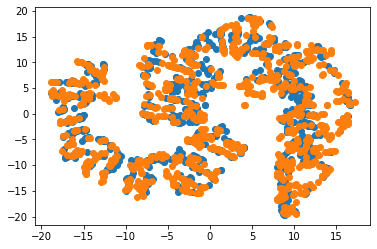

In [ ]:
plt.scatter(dp_tsne_df['real_x'], dp_tsne_df['real_y'])
plt.scatter(dp_tsne_df['gen_x'], dp_tsne_df['gen_y'])
plt.show()

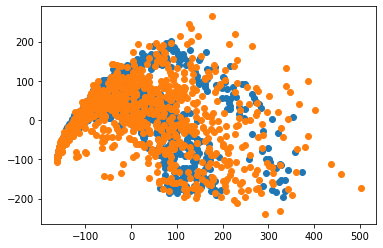

In [ ]:
plt.scatter(dp_pca_df['real_x'], dp_pca_df['real_y'])
plt.scatter(dp_pca_df['gen_x'], dp_pca_df['gen_y'])
plt.show()

Visualisation of PCA and tSNE plots for tGAN

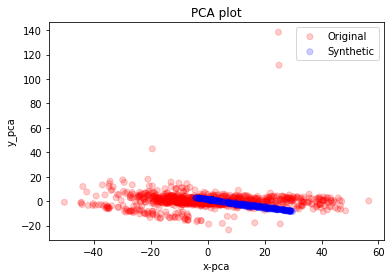

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.001461
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.842415
[t-SNE] KL divergence after 300 iterations: 1.013863


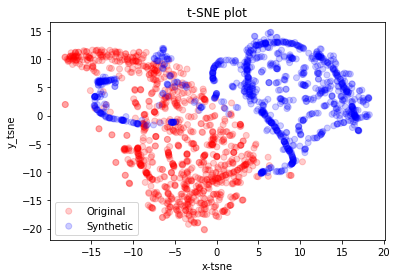

In [ ]:
tgan_pca_results, tgan_pca_hat_results = visualization(tgan_ori_data, tgan_gen_data, 'pca')
tgan_tsne_results, tgan_tsne_hat_results = visualization(tgan_ori_data, tgan_gen_data, 'tsne')

In [ ]:
# Save coordinates for d3 plots

tgan_pca_np = np.concatenate([tgan_pca_results, tgan_pca_hat_results], axis = 1)
tgan_pca_df = pd.DataFrame(tgan_pca_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
tgan_pca_df.to_csv('tgan_pca_coordinates.csv', index=False)

tgan_tsne_np = np.concatenate([tgan_tsne_results, tgan_tsne_hat_results], axis = 1)
tgan_tsne_df = pd.DataFrame(tgan_tsne_np, columns = ['real_x', 'real_y', 'gen_x', 'gen_y'])
tgan_tsne_df.to_csv('tgan_tsne_coordinates.csv', index=False)

Just checking I saved the right values :

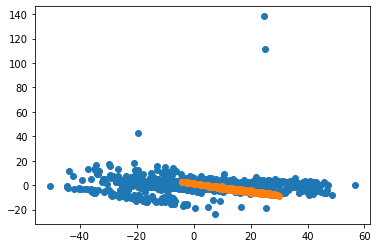

In [ ]:
plt.scatter(tgan_pca_df['real_x'], tgan_pca_df['real_y'])
plt.scatter(tgan_pca_df['gen_x'], tgan_pca_df['gen_y'])
plt.show()

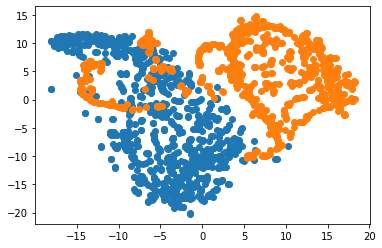

In [ ]:
plt.scatter(tgan_tsne_df['real_x'], tgan_tsne_df['real_y'])
plt.scatter(tgan_tsne_df['gen_x'], tgan_tsne_df['gen_y'])
plt.show()